In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
california = fetch_california_housing()
X = california.data
y = california.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
theta = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.00001
num_epochs = 100
batch_size = 32

In [5]:
accuracy_list = []
loss_list = []

In [6]:
start_time = time.time()
for epoch in range(num_epochs):
    total_loss = 0
    correct_predictions = 0

    for _ in range(0, len(X_b), batch_size):
        indices = np.random.choice(len(X_b), batch_size)
        xi_batch = X_b[indices]
        yi_batch = y[indices]

        gradient = 2 * xi_batch.T.dot(xi_batch.dot(theta) -
                                      yi_batch.reshape(-1, 1))
        theta -= learning_rate * gradient.mean(axis=1, keepdims=True)

        loss = np.square(xi_batch.dot(theta) - yi_batch.reshape(-1, 1))
        total_loss += np.sum(loss)
        predictions = xi_batch.dot(theta)
        correct_predictions += np.sum(np.abs(predictions -
                                             yi_batch.reshape(-1, 1)) < 0.5)

    accuracy = correct_predictions / len(X_b)
    avg_loss = total_loss / len(X_b)

    accuracy_list.append(accuracy)
    loss_list.append(avg_loss)
end_time = time.time()

In [7]:
y_pred = X_b.dot(theta)
print("Final theta:", theta)
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

Final theta: [[ 2.07097144]
 [ 0.77267104]
 [ 0.11124654]
 [-0.15704097]
 [ 0.22941683]
 [-0.00458707]
 [-0.0332162 ]
 [-1.00957725]
 [-0.9763317 ]]
Time taken: 3.59 seconds


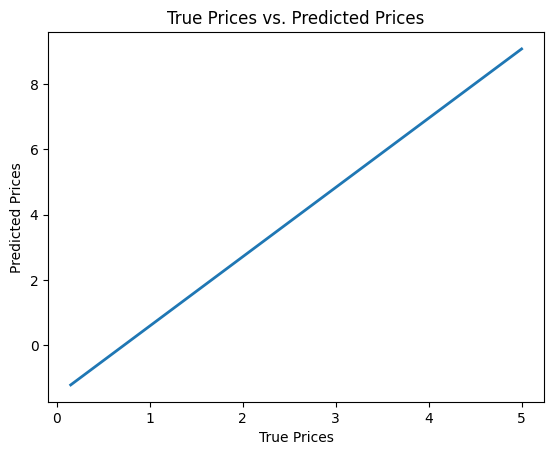

In [8]:
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], linewidth=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True Prices vs. Predicted Prices')
plt.show()

Text(0.5, 1.0, 'Accuracy vs. Epoch')

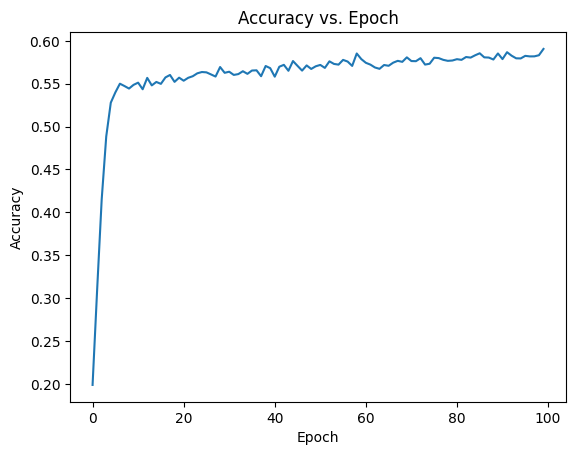

In [9]:
plt.plot(range(num_epochs), accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

Text(0.5, 1.0, 'Average Loss vs. Epoch')

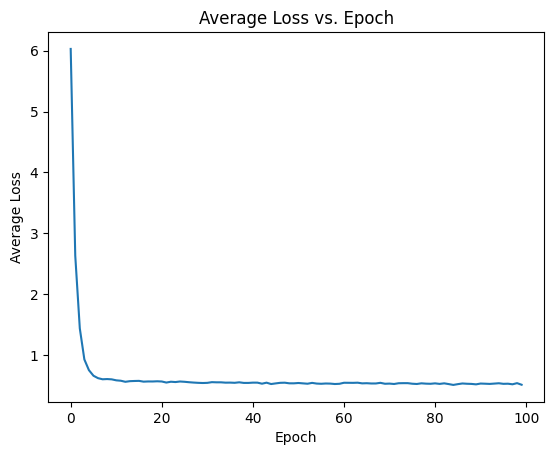

In [10]:
plt.plot(range(num_epochs), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss vs. Epoch')